In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# Read processed data
df = pd.read_csv('processed_data.csv')
print(df.shape)

(1465, 17)


In [3]:
df.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,review_title,review_content,category_1,category_2,category_3,category_4,category_5,category_6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN


In [4]:
example_reviews = df['review_content'][10]
print(example_reviews)

The cable is efficient in fast charging but in quick data transfer. Overall fine.,I like the usb c  L shape. Nylon Shielded core wire it improves the life of the cable.,i think i buy these every 6 months or so. fast charging stops working after a while. probbly something to do with the cable design. the cable gets twisted over time and I suspect that breaks the high capacity wires inside. but i keep buying it because there arent too many options in an L shaped design,Good and durable product. Sometime the charges doesn't work on few adapters. there might be few cut off or something but works fine on apple adapter, Car charger, USB,The product is really good at affordable price.,Good and fast charging, and value for money,பொருள் உடைய கடினத்தன்மையின் நன்றாக உள்ளது சார்ஜ் ஏறும் வேகம் 15wat,Not a fast charger.  Very slow charging with 65w.  L-shape pin is very useful.


In [5]:
# If encountered LookupError, run following code once
# nltk.download()

In [6]:
tokens = nltk.word_tokenize(example_reviews)
tokens[:20]

['The',
 'cable',
 'is',
 'efficient',
 'in',
 'fast',
 'charging',
 'but',
 'in',
 'quick',
 'data',
 'transfer',
 '.',
 'Overall',
 'fine.',
 ',',
 'I',
 'like',
 'the',
 'usb']

In [7]:
tags = nltk.pos_tag(tokens)
tags[:10]

[('The', 'DT'),
 ('cable', 'NN'),
 ('is', 'VBZ'),
 ('efficient', 'JJ'),
 ('in', 'IN'),
 ('fast', 'JJ'),
 ('charging', 'NN'),
 ('but', 'CC'),
 ('in', 'IN'),
 ('quick', 'JJ')]

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [9]:
sia.polarity_scores(example_reviews)


{'neg': 0.064, 'neu': 0.797, 'pos': 0.139, 'compound': 0.9236}

In [10]:
# Run the polarity score on the entire dataset
reviews = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    content = row['review_content']
    id = str(row.name)
    reviews[id] = sia.polarity_scores(content)

  0%|          | 0/1465 [00:00<?, ?it/s]

In [11]:
vaders = pd.DataFrame(reviews)
vaders

,0,1,2,3,4,5,6,7,8,9,...,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464
neg,0.0320,0.0100,0.0000,0.0280,0.1160,0.0870,0.0280,0.0510,0.0410,0.0100,...,0.011,0.0,0.0220,0.059,0.1190,0.0160,0.1220,0.0830,0.061,0.0070
neu,0.7440,0.8210,0.6410,0.8000,0.7190,0.5730,0.8640,0.8010,0.8280,0.8210,...,0.811,1.0,0.8580,0.795,0.6230,0.7630,0.7140,0.7180,0.882,0.8470
pos,0.2240,0.1690,0.3590,0.1720,0.1650,0.3400,0.1090,0.1480,0.1320,0.1690,...,0.178,0.0,0.1210,0.146,0.2580,0.2210,0.1640,0.1990,0.057,0.1460
compound,0.9033,0.9853,0.6808,0.8316,0.9809,0.6611,0.8735,0.9334,0.9956,0.9853,...,0.972,0.0,0.9686,0.937,0.7096,0.9468,0.7876,0.9698,-0.296,0.9915


#### Process succeed, but we want the sentiment score on each row, so we can use transpose operation

In [12]:
vaders = pd.DataFrame(reviews).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left',left_index=True, right_index=True)
vaders

,Id,neg,neu,pos,compound,product_id,product_name,discounted_price,actual_price,discount_percentage,...,about_product,user_id,review_title,review_content,category_1,category_2,category_3,category_4,category_5,category_6
0,0,0.032,0.744,0.224,0.9033,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64%,...,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
1,1,0.010,0.821,0.169,0.9853,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43%,...,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
2,2,0.000,0.641,0.359,0.6808,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90%,...,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
3,3,0.028,0.800,0.172,0.8316,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53%,...,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
4,4,0.116,0.719,0.165,0.9809,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61%,...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,1460,0.016,0.763,0.221,0.9468,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59%,...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,NaN,NaN
1461,1461,0.122,0.714,0.164,0.7876,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25%,...,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,NaN,NaN
1462,1462,0.083,0.718,0.199,0.9698,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28%,...,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,NaN,NaN
1463,1463,0.061,0.882,0.057,-0.2960,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26%,...,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,NaN,NaN


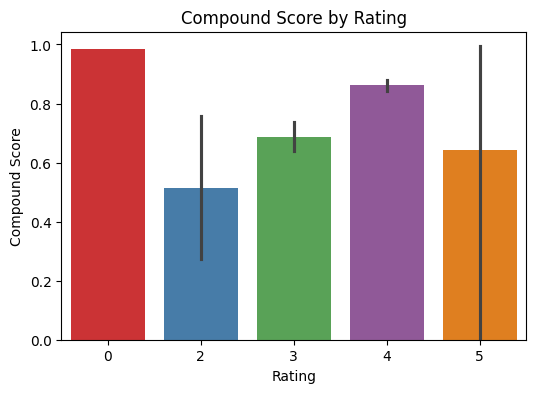

In [18]:
import math
# Fill the NaN and using math.floor() to get rating_bin
vaders.fillna({'rating': 0}, inplace=True)
vaders['rating_bin'] = vaders['rating'].apply(lambda x: math.floor(x))

plt.figure(figsize=(6, 4))
colors = sns.color_palette('Set1',5)
ax = sns.barplot(data=vaders, x='rating_bin', y='compound', hue='rating_bin', legend = False, palette=colors)
ax.set_title('Compound Score by Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Compound Score')
plt.show()


In [20]:
# Checking why the compound score is so different in rating 5
vaders_check = vaders[vaders['rating_bin'] >= 5]
vaders_check.head()

,Id,neg,neu,pos,compound,product_id,product_name,discounted_price,actual_price,discount_percentage,...,user_id,review_title,review_content,category_1,category_2,category_3,category_4,category_5,category_6,rating_bin
174,174,0.000,0.588,0.412,0.9382,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,399.0,1999.0,80%,...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,5
324,324,0.000,1.000,0.000,0.0000,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",249.0,999.0,75%,...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Awesome Product,Quick delivery.Awesome ProductPacking was good...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,5
775,775,0.006,0.796,0.198,0.9935,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,499.0,1000.0,50%,...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,Computers&Accessories,Accessories&Peripherals,"Keyboards,Mice&InputDevices",Mice,NaN,NaN,5


#### We only have 3 items in rating 5, and one of them get 0.0000, so it makes a really high ci.

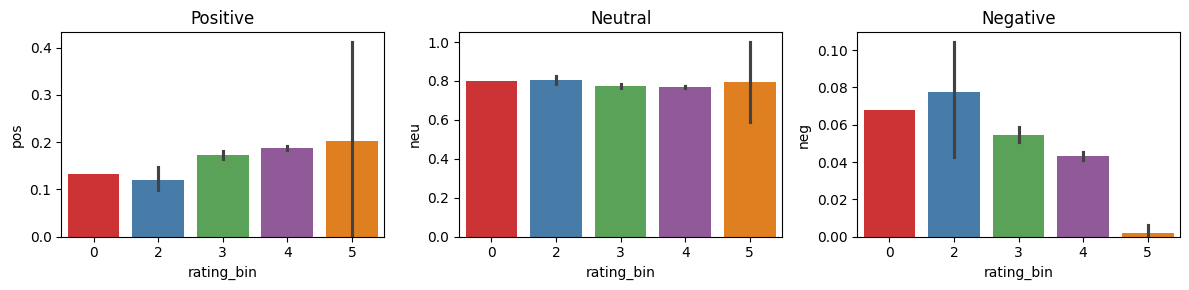

In [22]:
# Generating the plot for each score
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating_bin', y='pos', ax=axs[0], hue='rating_bin', legend = False, palette=colors)
sns.barplot(data=vaders, x='rating_bin', y='neu', ax=axs[1], hue='rating_bin', legend = False, palette=colors)
sns.barplot(data=vaders, x='rating_bin', y='neg', ax=axs[2], hue='rating_bin', legend = False, palette=colors)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### Interestingly, the sentiment analysis suggests that most of the reviews are neutral. The most significant difference is the usage of negative words. We can observe a negative correlation between ratings and the negative words.